In [1]:
%matplotlib notebook 

import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import grad

import scipy.optimize
import matplotlib.pyplot as plot

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [31]:
npr.seed(1234)

In [42]:
n_dim = 1
bias = npr.randn()
noise_std = 1.
tra_ratio = 0.5
n_samples = 100

x_ = 4. * npr.rand(n_samples) - 2.
y_ = numpy.sin(10. * x_) + x_**2

y_ += bias

n_tra = numpy.round(n_samples * tra_ratio).astype('int')
x_tra, y_tra = x_[:n_tra], y_[:n_tra]
x_tes, y_tes = x_[:n_tra], y_[:n_tra]

y_tra = y_tra + noise_std * npr.randn(*y_tra.shape)

In [43]:
def linreg(x, w):
    x = x[:, None] if len(x.shape) < 2 else x
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    return y

In [44]:
def linreg_dist(y, x, w, avg=False):
    y_ = linreg(x, w)
    
    d = ((y - y_) ** 2)
    
    if not avg:
        return d
    return numpy.mean(d)

In [45]:
def cost(w, x, y):
    return linreg_dist(y, x, w, avg=True)

linreg_rule = grad(cost)

In [46]:
def _linreg_dist(w, x, y, avg=False):
    return linreg_dist(y, x, w, avg=avg), linreg_rule(w, x, y)

In [53]:
w0 = 0.1 * numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

res = scipy.optimize.minimize(_linreg_dist, w0, (x_tra, y_tra, True), method='L-BFGS-B', jac=True)

In [54]:
print res
w = res.x

      fun: 2.9278910434735552
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.01298367e-08,   1.77430522e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 5
      nit: 4
   status: 0
  success: True
        x: array([-0.16842322,  2.47763214])


In [55]:
# visualize data 
def vis_data(x, y, c='r'):
    if y is None: 
        y = [0] * len(x)
    plot.plot(x, y, 'x', markerfacecolor='none', markeredgecolor=c)
    plot.grid('on')

In [56]:
def vis_pred(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = linreg(x_, w)
    
    plt1, = plot.plot(x_, y_, typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    return plt1

<IPython.core.display.Javascript object>


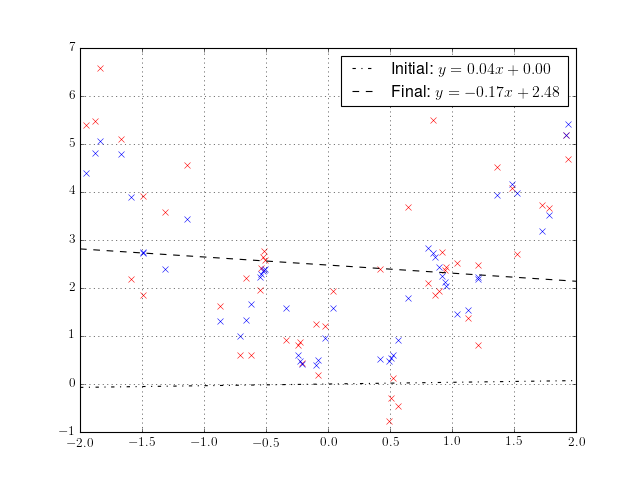

In [57]:
plot.figure()

vis_data(x_tra, y_tra, c='r')
vis_data(x_tes, y_tes, c='b')

plt0 = vis_pred(w0, 'k-.')
plt1 = vis_pred(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: $y = {:.2f} x + {:.2f}$'.format(*list(w0)),
        'Final: $y = {:.2f} x + {:.2f}$'.format(*list(w))],
           loc='best')

plot.show()

In [52]:
tra_er = ((linreg(x_tra, w) - y_tra) ** 2).mean()
tes_er = ((linreg(x_tes, w) - y_tes) ** 2).mean()

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 2.92789104347, Test error rate 2.00290514139
